In [ ]:
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
import os
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [ ]:
print(os.listdir('/content/drive/MyDrive/flowers/flowers/train'))

['bluebell', 'windflower', 'tulip', 'tigerlily', 'crocus', 'fritillary', 'dandelion', 'iris', 'daffodil', 'pansy', 'snowdrop', 'daisy', 'lily_valley', 'sunflower', 'buttercup', 'colts_foot', 'cowslip']


In [ ]:
os.listdir('/content/drive/MyDrive/flowers/flowers/validation')

['windflower',
 'tigerlily',
 'tulip',
 'sunflower',
 'pansy',
 'iris',
 'snowdrop',
 'fritillary',
 'lily_valley',
 'dandelion',
 'crocus',
 'buttercup',
 'daisy',
 'colts_foot',
 'cowslip',
 'bluebell',
 'daffodil']

In [ ]:
x_train=[]
y_train=[]
li=['windflower','tigerlily','tulip','sunflower','pansy','iris','snowdrop','fritillary','lily_valley','dandelion','crocus','buttercup','daisy','colts_foot','cowslip','bluebell','daffodil']
datadir='/content/drive/MyDrive/flowers/flowers/train'
for i in li:
  print('Loading.............',i)
  path=os.path.join(datadir,i)
  img=os.listdir(path)
  for image in img:
    imgpath=os.path.join(path,image)
    img_array=imread(imgpath)
    img_resize=resize(img_array,(150,150,1))
    x_train.append(img_resize)
    y_train.append(li.index(i))
  print('Completed..........',i)

Loading............. windflower
Completed.......... windflower
Loading............. tigerlily
Completed.......... tigerlily
Loading............. tulip
Completed.......... tulip
Loading............. sunflower
Completed.......... sunflower
Loading............. pansy
Completed.......... pansy
Loading............. iris
Completed.......... iris
Loading............. snowdrop
Completed.......... snowdrop
Loading............. fritillary
Completed.......... fritillary
Loading............. lily_valley
Completed.......... lily_valley
Loading............. dandelion
Completed.......... dandelion
Loading............. crocus
Completed.......... crocus
Loading............. buttercup
Completed.......... buttercup
Loading............. daisy
Completed.......... daisy
Loading............. colts_foot
Completed.......... colts_foot
Loading............. cowslip
Completed.......... cowslip
Loading............. bluebell
Completed.......... bluebell
Loading............. daffodil
Completed.......... daffodil


In [ ]:
x_test=[]
y_test=[]
li=['windflower','tigerlily','tulip','sunflower','pansy','iris','snowdrop','fritillary','lily_valley','dandelion','crocus','buttercup','daisy','colts_foot','cowslip','bluebell','daffodil']
datadir='/content/drive/MyDrive/flowers/flowers/validation'
for i in li:
  print('Loading.............',i)
  path=os.path.join(datadir,i)
  img=os.listdir(path)
  for image in img:
    imgpath=os.path.join(path,image)
    img_array=imread(imgpath)
    img_resize=resize(img_array,(150,150,1))
    x_test.append(img_resize)
    y_test.append(li.index(i))
  print('Completed..........',i)

Loading............. windflower
Completed.......... windflower
Loading............. tigerlily
Completed.......... tigerlily
Loading............. tulip
Completed.......... tulip
Loading............. sunflower
Completed.......... sunflower
Loading............. pansy
Completed.......... pansy
Loading............. iris
Completed.......... iris
Loading............. snowdrop
Completed.......... snowdrop
Loading............. fritillary
Completed.......... fritillary
Loading............. lily_valley
Completed.......... lily_valley
Loading............. dandelion
Completed.......... dandelion
Loading............. crocus
Completed.......... crocus
Loading............. buttercup
Completed.......... buttercup
Loading............. daisy
Completed.......... daisy
Loading............. colts_foot
Completed.......... colts_foot
Loading............. cowslip
Completed.......... cowslip
Loading............. bluebell
Completed.......... bluebell
Loading............. daffodil
Completed.......... daffodil


In [ ]:
import numpy as np
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
x_train.shape,x_test.shape

((1190, 150, 150, 1), (170, 150, 150, 1))

In [ ]:
y_train.shape,y_test.shape

((1190,), (170,))

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,1),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(17,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=20,batch_size=20)

Epoch 1/20
60/60 [==============================] - 28s 474ms/step - loss: 2.1014 - accuracy: 0.3647
Epoch 2/20
60/60 [==============================] - 29s 479ms/step - loss: 1.2430 - accuracy: 0.6269
Epoch 3/20
60/60 [==============================] - 30s 501ms/step - loss: 0.5147 - accuracy: 0.8723
Epoch 4/20
60/60 [==============================] - 29s 486ms/step - loss: 0.1512 - accuracy: 0.9748
Epoch 5/20
60/60 [==============================] - 30s 504ms/step - loss: 0.0393 - accuracy: 0.9958
Epoch 6/20
60/60 [==============================] - 31s 506ms/step - loss: 0.0214 - accuracy: 0.9975
Epoch 7/20
60/60 [==============================] - 30s 494ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 8/20
60/60 [==============================] - 29s 492ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 9/20
60/60 [==============================] - 29s 488ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 10/20
60/60 [==============================] - 29s 486ms/step - loss: 0.0015 - accura

In [ ]:
model.evaluate(x_test,y_test)

6/6 [==============================] - 1s 163ms/step - loss: 3.9924 - accuracy: 0.4000


[3.992440700531006, 0.4000000059604645]

array([[[ 85,  88,  35],
        [ 84,  87,  34],
        [ 81,  85,  35],
        ...,
        [ 80,  29, 132],
        [ 80,  29, 132],
        [ 80,  29, 132]],

       [[ 84,  87,  34],
        [ 83,  85,  35],
        [ 81,  85,  35],
        ...,
        [ 80,  29, 132],
        [ 80,  29, 132],
        [ 80,  29, 132]],

       [[ 83,  85,  35],
        [ 82,  84,  34],
        [ 80,  84,  34],
        ...,
        [ 80,  29, 132],
        [ 80,  29, 132],
        [ 80,  29, 132]],

       ...,

       [[106, 113,  36],
        [110, 117,  40],
        [114, 121,  43],
        ...,
        [ 62,  48,  47],
        [ 61,  47,  44],
        [ 60,  46,  45]],

       [[105, 113,  40],
        [109, 117,  42],
        [114, 120,  46],
        ...,
        [ 62,  48,  47],
        [ 61,  47,  46],
        [ 60,  46,  45]],

       [[105, 113,  40],
        [109, 117,  42],
        [114, 120,  46],
        ...,
        [ 62,  48,  47],
        [ 61,  47,  46],
        [ 60,  46,  45]]], dtype=uint8)
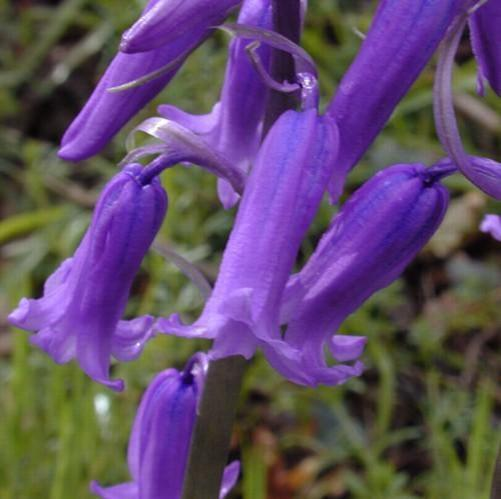

In [ ]:
img=imread('/content/drive/MyDrive/flowers/flowers/train/bluebell/image_0251.jpg')
img

In [ ]:
img=resize(img,(150,150,1))
img.shape

(150, 150, 1)

In [ ]:
img=img.reshape(1,150,150,1)
img.shape

(1, 150, 150, 1)

In [ ]:
pred=model.predict(img)
pred

1/1 [==============================] - 0s 106ms/step


array([[7.8096883e-07, 2.4722416e-05, 3.1464914e-08, 7.3772378e-07,
        2.0286216e-06, 1.8662971e-07, 3.9260820e-07, 4.4638789e-05,
        1.6776558e-07, 1.3427392e-05, 9.7732436e-07, 1.1192845e-05,
        7.9580717e-11, 1.1535068e-05, 1.3769753e-04, 9.9975044e-01,
        1.0470950e-06]], dtype=float32)

In [ ]:
ind=pred.argmax(axis=1)

In [ ]:
li[ind.item()]

'bluebell'